------------------------------UNIFIED VIEW--------------------------------

  unique_part_identifer cycle_start_timestamp        PART_TYPE  max_pressure  \
0             uid_11285   2024-01-15 00:00:00  BMW_LARGE_WHEEL     51.507711   
1             uid_11286   2024-01-15 00:30:00  BMW_LARGE_WHEEL     52.036447   
2             uid_11287   2024-01-15 01:00:00  BMW_LARGE_WHEEL     50.503723   
3             uid_11288   2024-01-15 01:30:00  BMW_LARGE_WHEEL     50.345908   
4             uid_11289   2024-01-15 02:00:00  BMW_LARGE_WHEEL     50.826550   
5             uid_11290   2024-01-15 02:30:00  BMW_LARGE_WHEEL     51.776302   
6             uid_11291   2024-01-15 03:00:00  BMW_LARGE_WHEEL     51.331237   
7             uid_11292   2024-01-15 03:30:00  BMW_LARGE_WHEEL     50.800816   
8             uid_11293   2024-01-15 04:00:00  BMW_LARGE_WHEEL     53.321533   
9             uid_11294   2024-01-15 04:30:00  BMW_LARGE_WHEEL     50.282106   

   time_to_peak  casting Temperature  furna

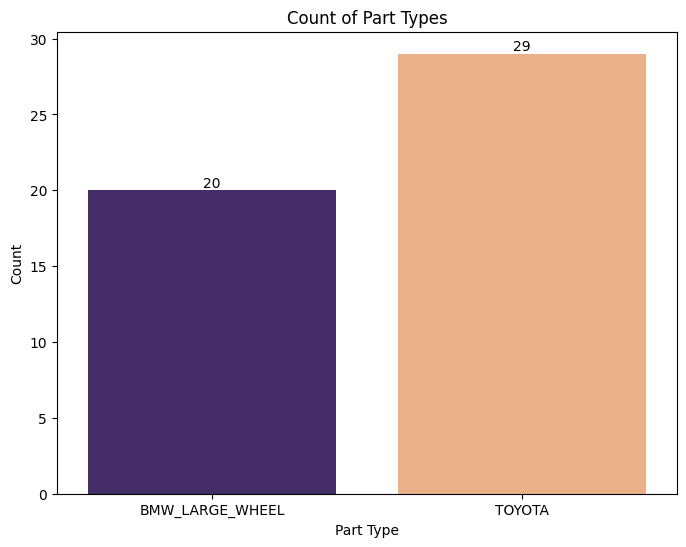




# there seems to be more Toyota than BMW parts produced during the period
# either Totota parts have shorter cycle times, are less complex to make or are in higher volume
# all part ID's are unique so one of each part
# Toyota (29 parts) and BMW_LARGE_WHEEL(20 parts)



-----------------------------DESCRIPTIVE STATISTICS--------------------------------------

      cycle_start_timestamp  max_pressure  time_to_peak  casting Temperature  \
count                    49     49.000000     49.000000            49.000000   
mean    2024-01-15 12:00:00     51.253720     17.894558           713.133095   
min     2024-01-15 00:00:00     47.575254     13.833333           710.392147   
25%     2024-01-15 06:00:00     50.648264     15.666667           711.426896   
50%     2024-01-15 12:00:00     51.215509     18.500000           713.147729   
75%     2024-01-15 18:00:00     51.798996     19.833333           714.730643   
max     2024-01-16 00:00:00     54.355268     21.333333           717.05982

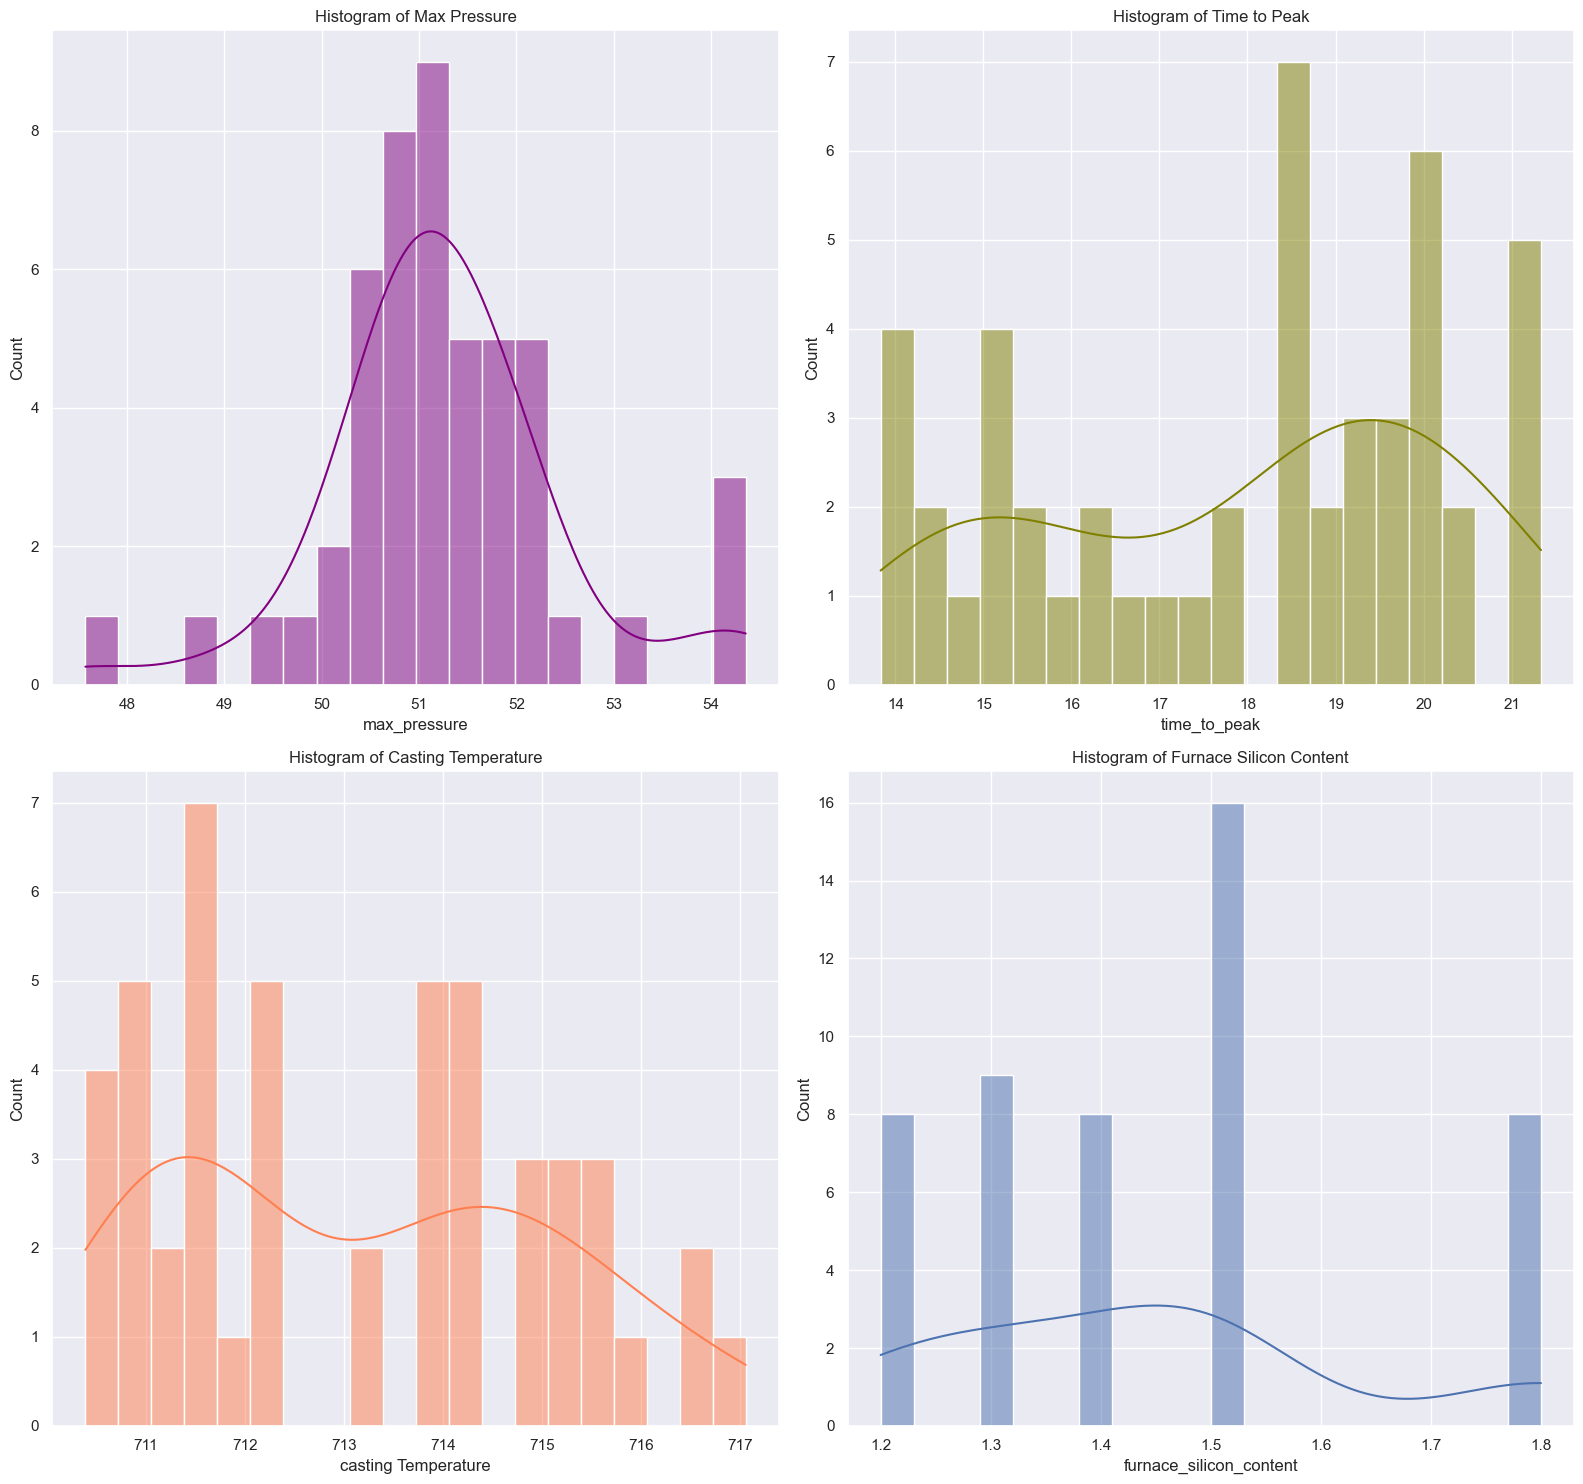




> max pressure data looks normally distributed as there seems to be a bell curve,
> however statstical tests for all distributions will be done to confirm
> the rest of the columns exhibit skewness and dont follow a normal distributionm
> casting temperature and time_to_peak looks slightly bimodal
> this will pose issues during model development if these features were to be used for prediction
> some models like linear regression require normal data
> normalization and feature scaling (e.g. StandardScaler or Min Max method) would have to be used as part of pre-processing
> for parametric hypothesis testing and stastical testing - normal data is required as well



--------------------------------DATA STABILITY-------------------------------------



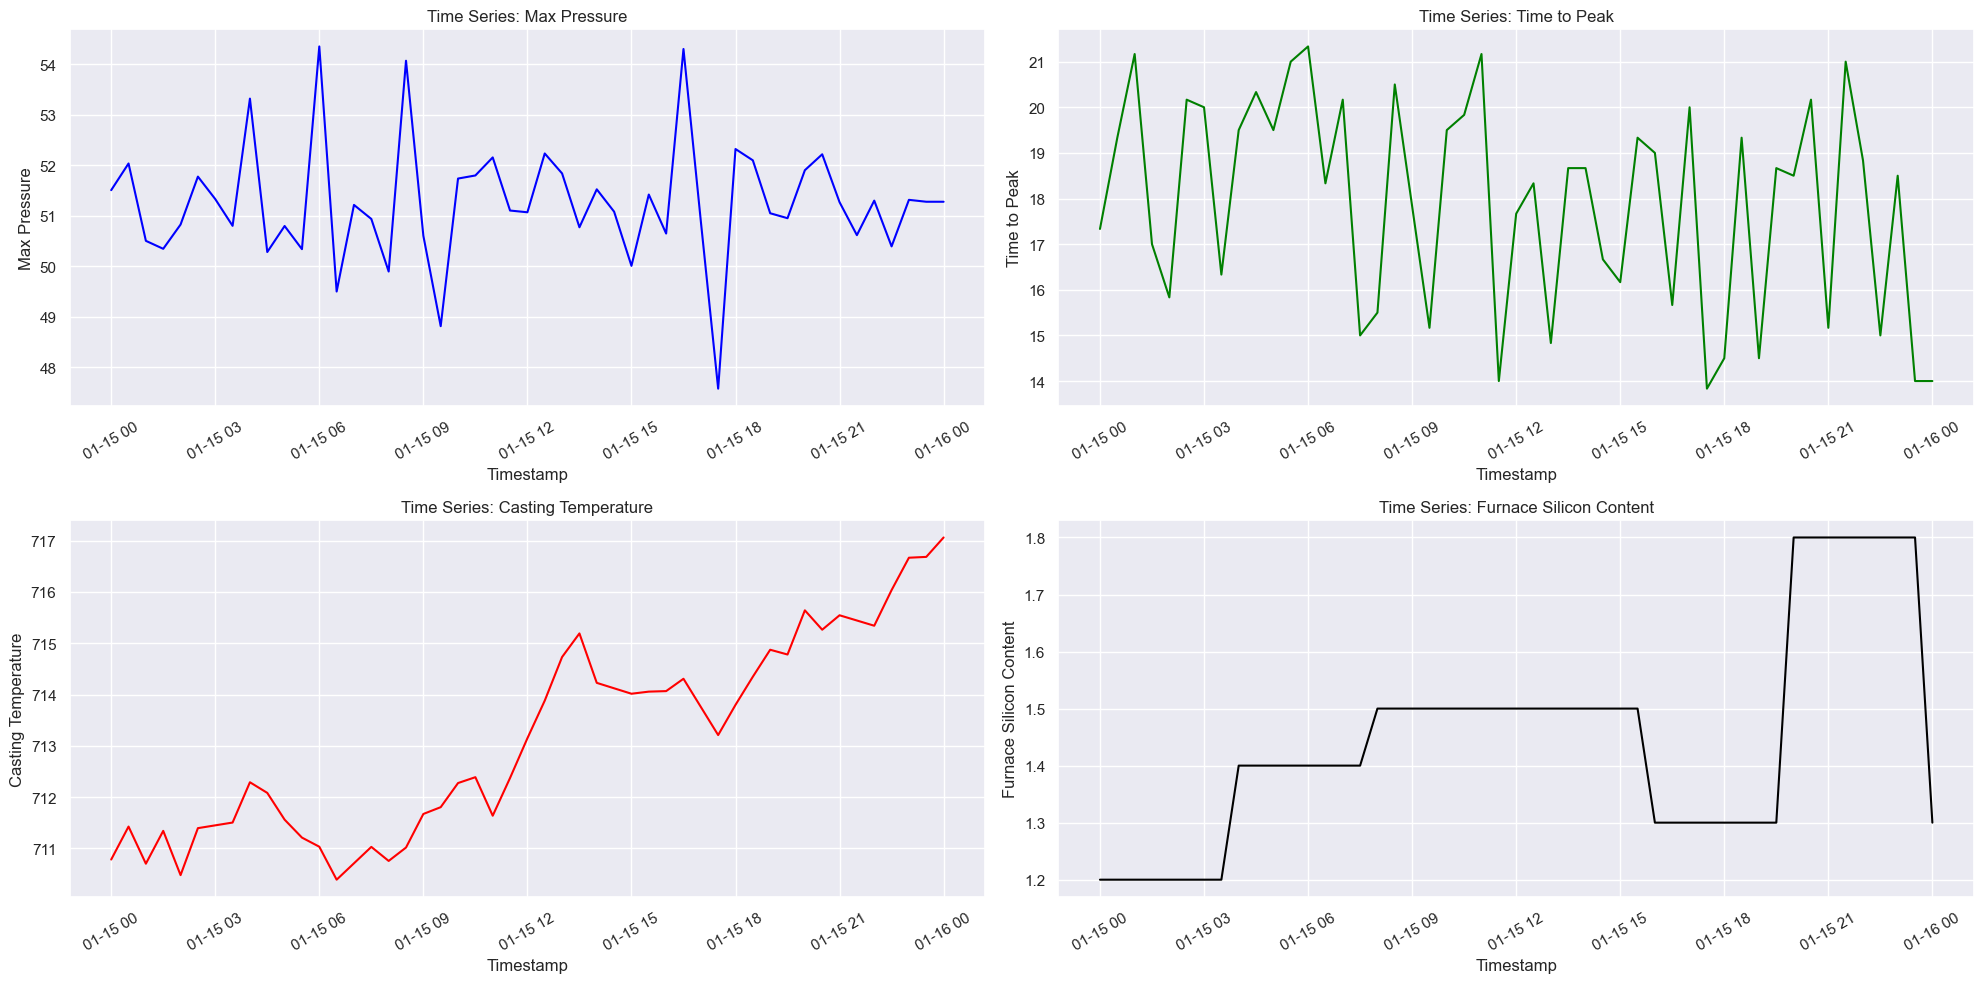




> graphs show alot of special causes in the process (alot of instability)
> Common cause(random variation) is variation caused by unknown factors
> It creates a steady but random distribution of output around the average of the data. It usually follows the normal distribution.
> However here special cause variation (non-random variation) seems to be present
> casting Temperature and time_to_peak plots show alot of short term variability indicating noise in the process
> This is seconded by the std deviation calculated above
> The casting temperature profile indicates an upward trend - it seems that the casting temperature is increasing over time
> This is indicating change/abnormality in the process
> the casting temperature profile indicates rapid change
> the furnace_silicon_content profile indicates a cyclic trend - this is because of the long periods (every 4 hours) recording
> there is a sudden spike of silicon content which may be as a result of incorrect silicon addition/dosi

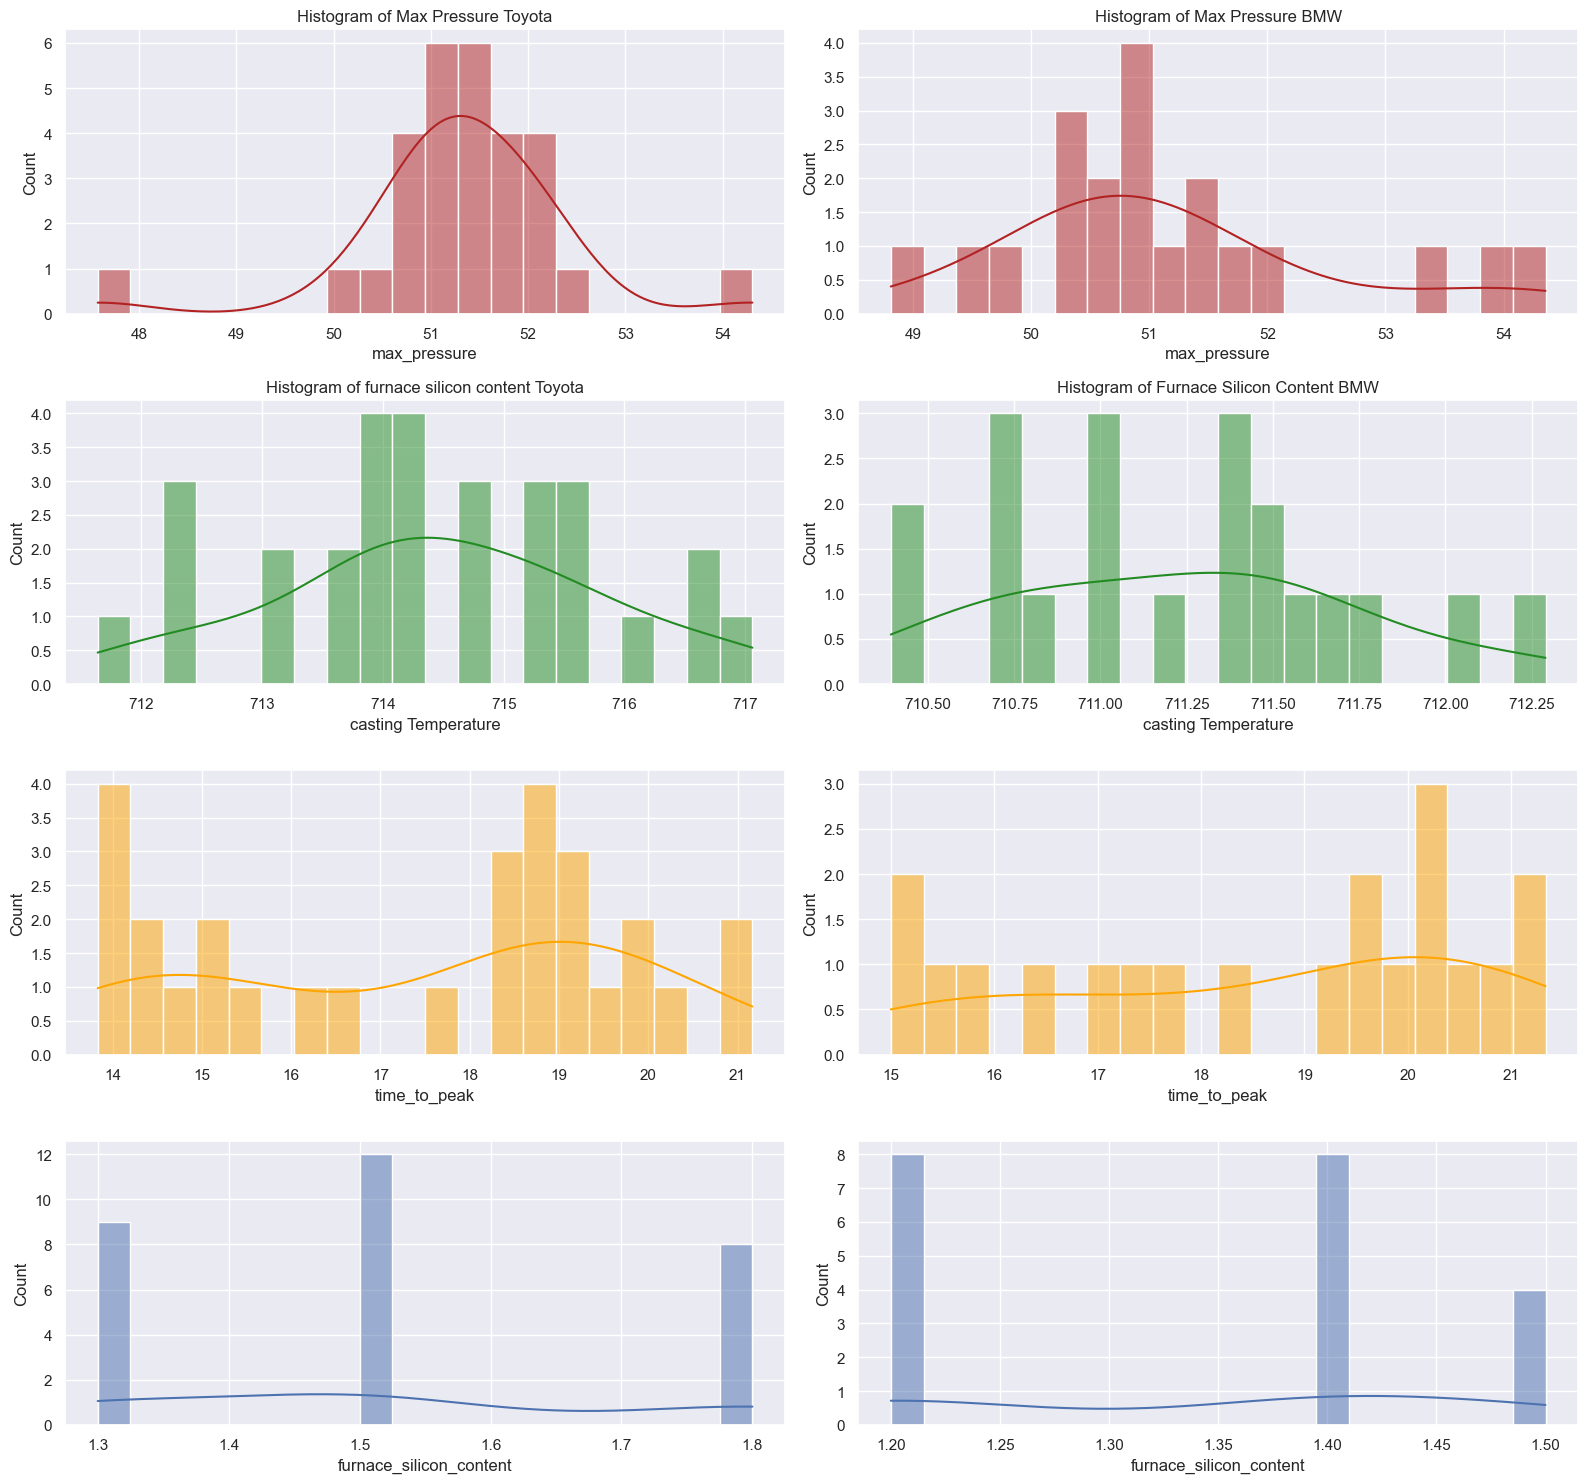




> all distribution are visually not normal
> no need to do normality tests to confirm - process was shown above



----------------------------DATA STABILITY (BY PART)------------------------------



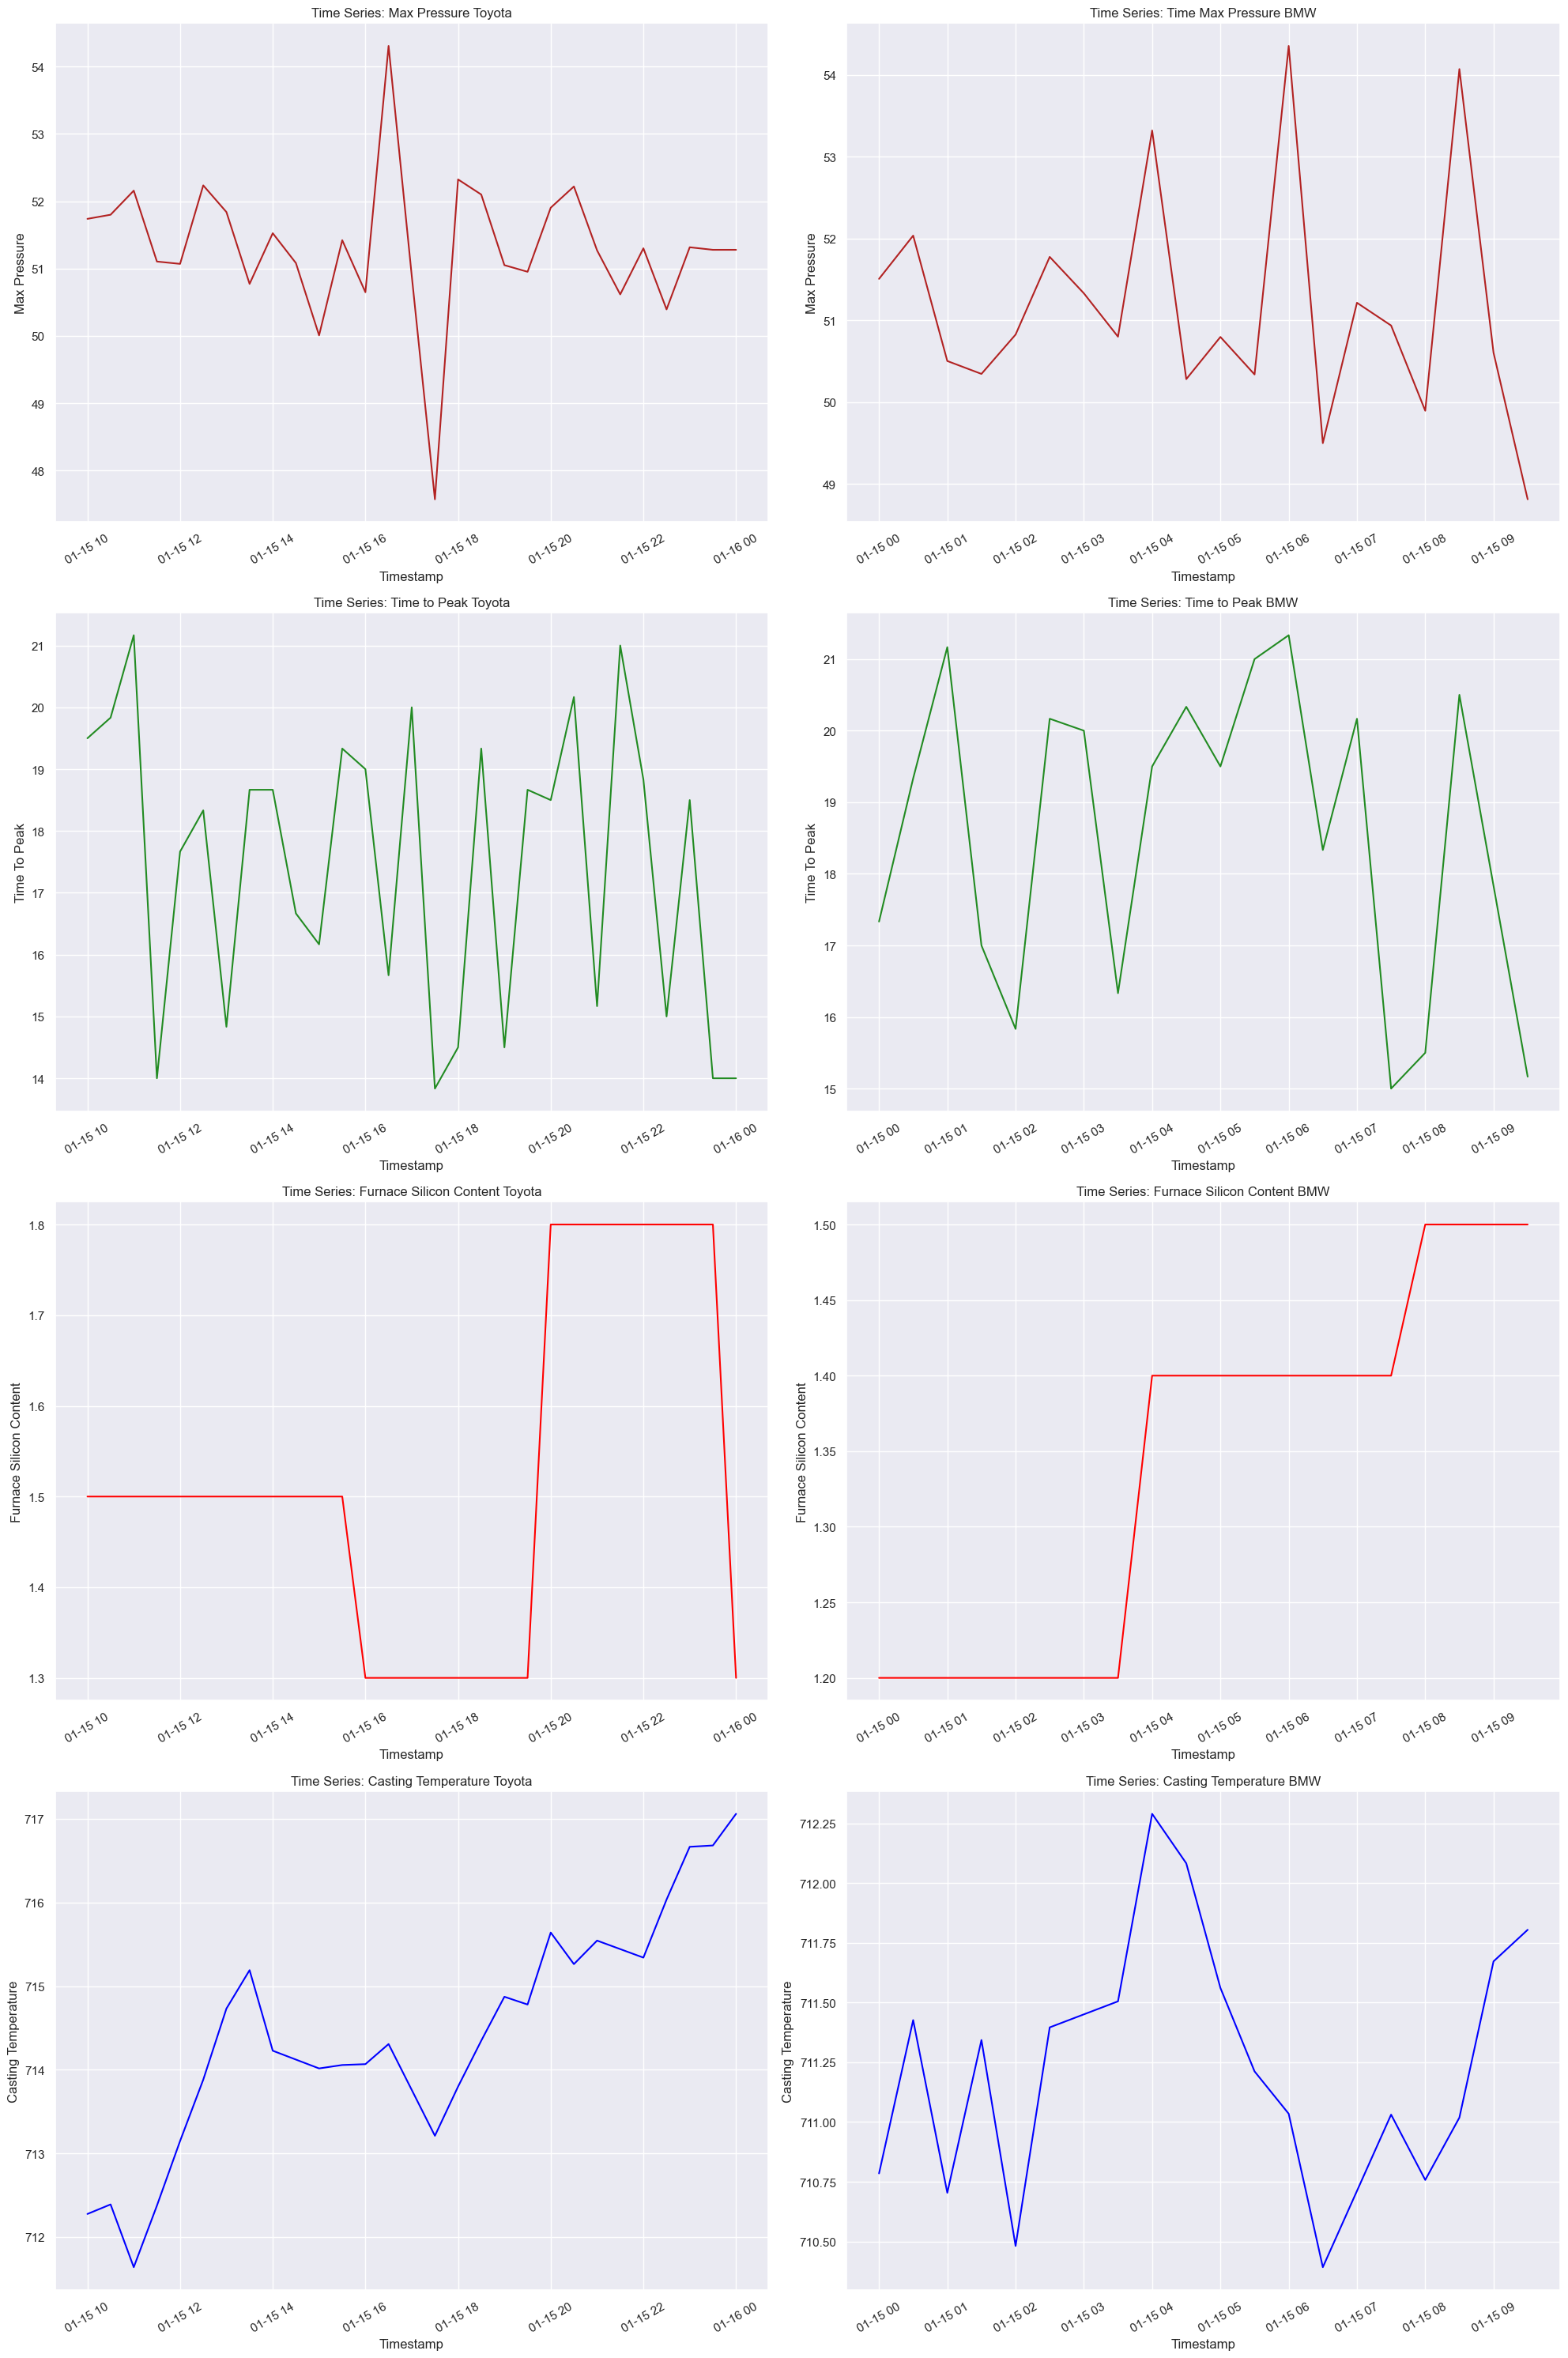




> Time series plots show that max pressure for BMW parts fluctuates more than Toyota
> over time it has gotten worse - Toyota parts trend is fairly stable with limited noise on the short term
> despite more stability in the max pressure in Toyota - the time to peak still fluctuates
> this is indicating that there are issues in consistently reaching the max pressure
> furnace content for BMW parts shows a pattern of increase as silicon content decreases
> there seems to be a linear upward trend for casting temperature for Toyota parts
> this is indicating some issue in maintaining a constant temperature (possibly due to reduction in silicon content)
> silicon content lowers melting point of metal resulting in lower casting temperature having to be maintained
> this could result in possible quality issues and increased energy costs over time
> the casting temperature for BMW parts is also out of control - indicating poor temperature control in the casting process



------------------

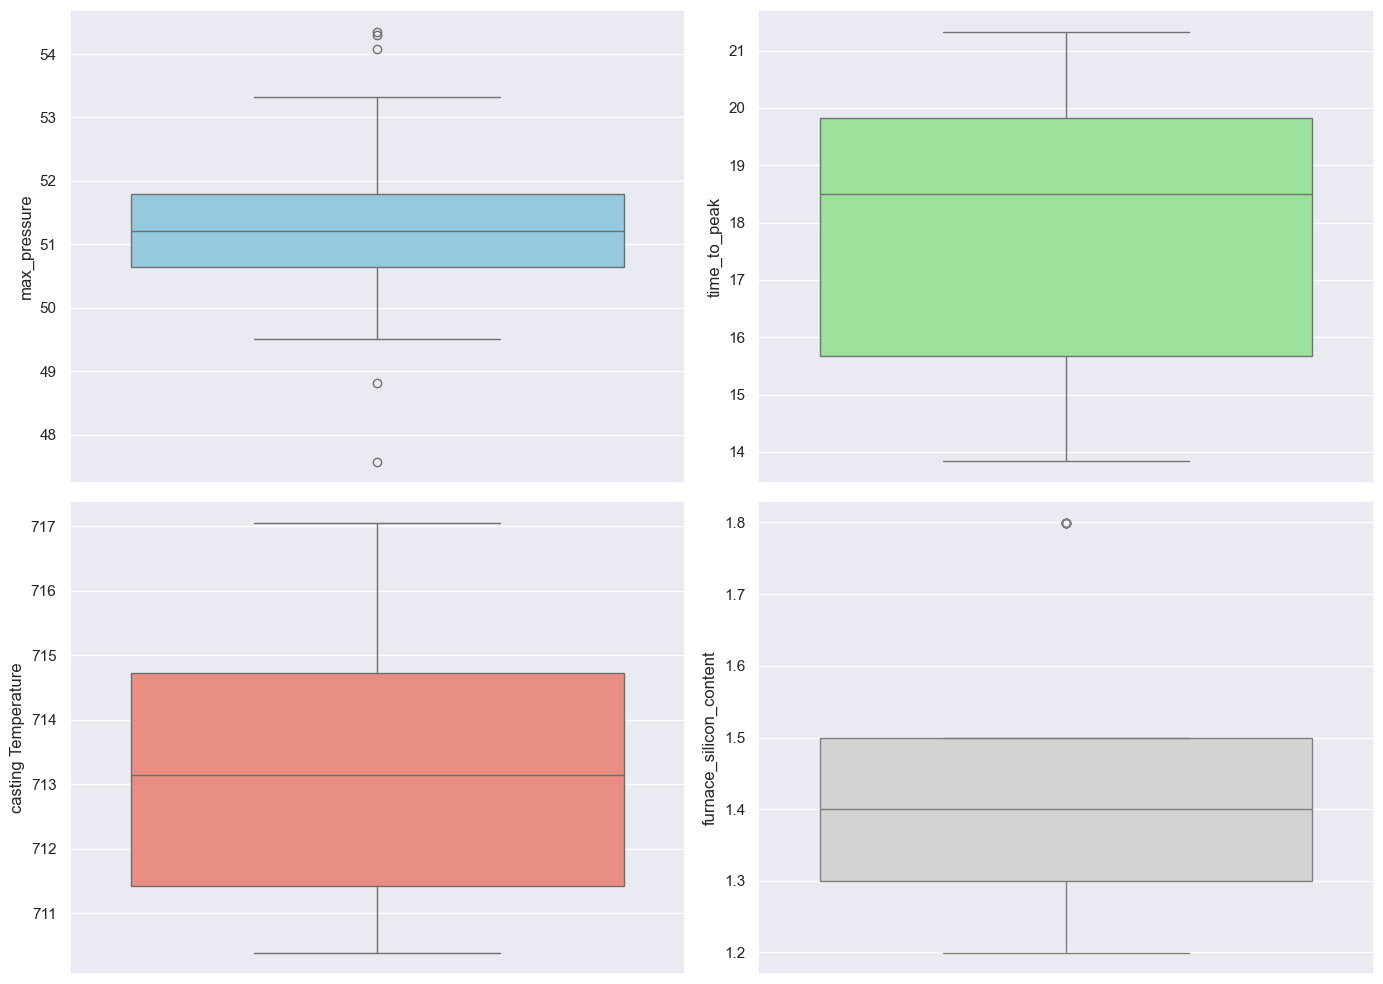




# interpreting the results
> median(centre line) will give an indication of measures of location (central tendency)
> long whiskers indicate greater spread (into Q1(quartile 1) and Q3(quartile 3) regions)
> and short whiskers indicate points are closer to IQR (interquartile range)
> box length indicates variation in process
> max pressure box plot shows limited variation(box is not too long) and symmetric distribution (centered median line),
> however there are alot of outliers >54 and <49 for max pressure
> max_pressure box plot indicates no skewness,however whiskers do indicate some spread into the Q1 and Q3 ranges
> time to peak and casting temperature have no outliers but alot of variation (large box width),
> this is also noticeable on time series plots for time to peak and casting temperature
> median line of time_to_peak indicates top skewness (theres a few values stretching the distribution to the right)
> furnace_silicon_data has limited spread into Q3 upper quartile (no wh

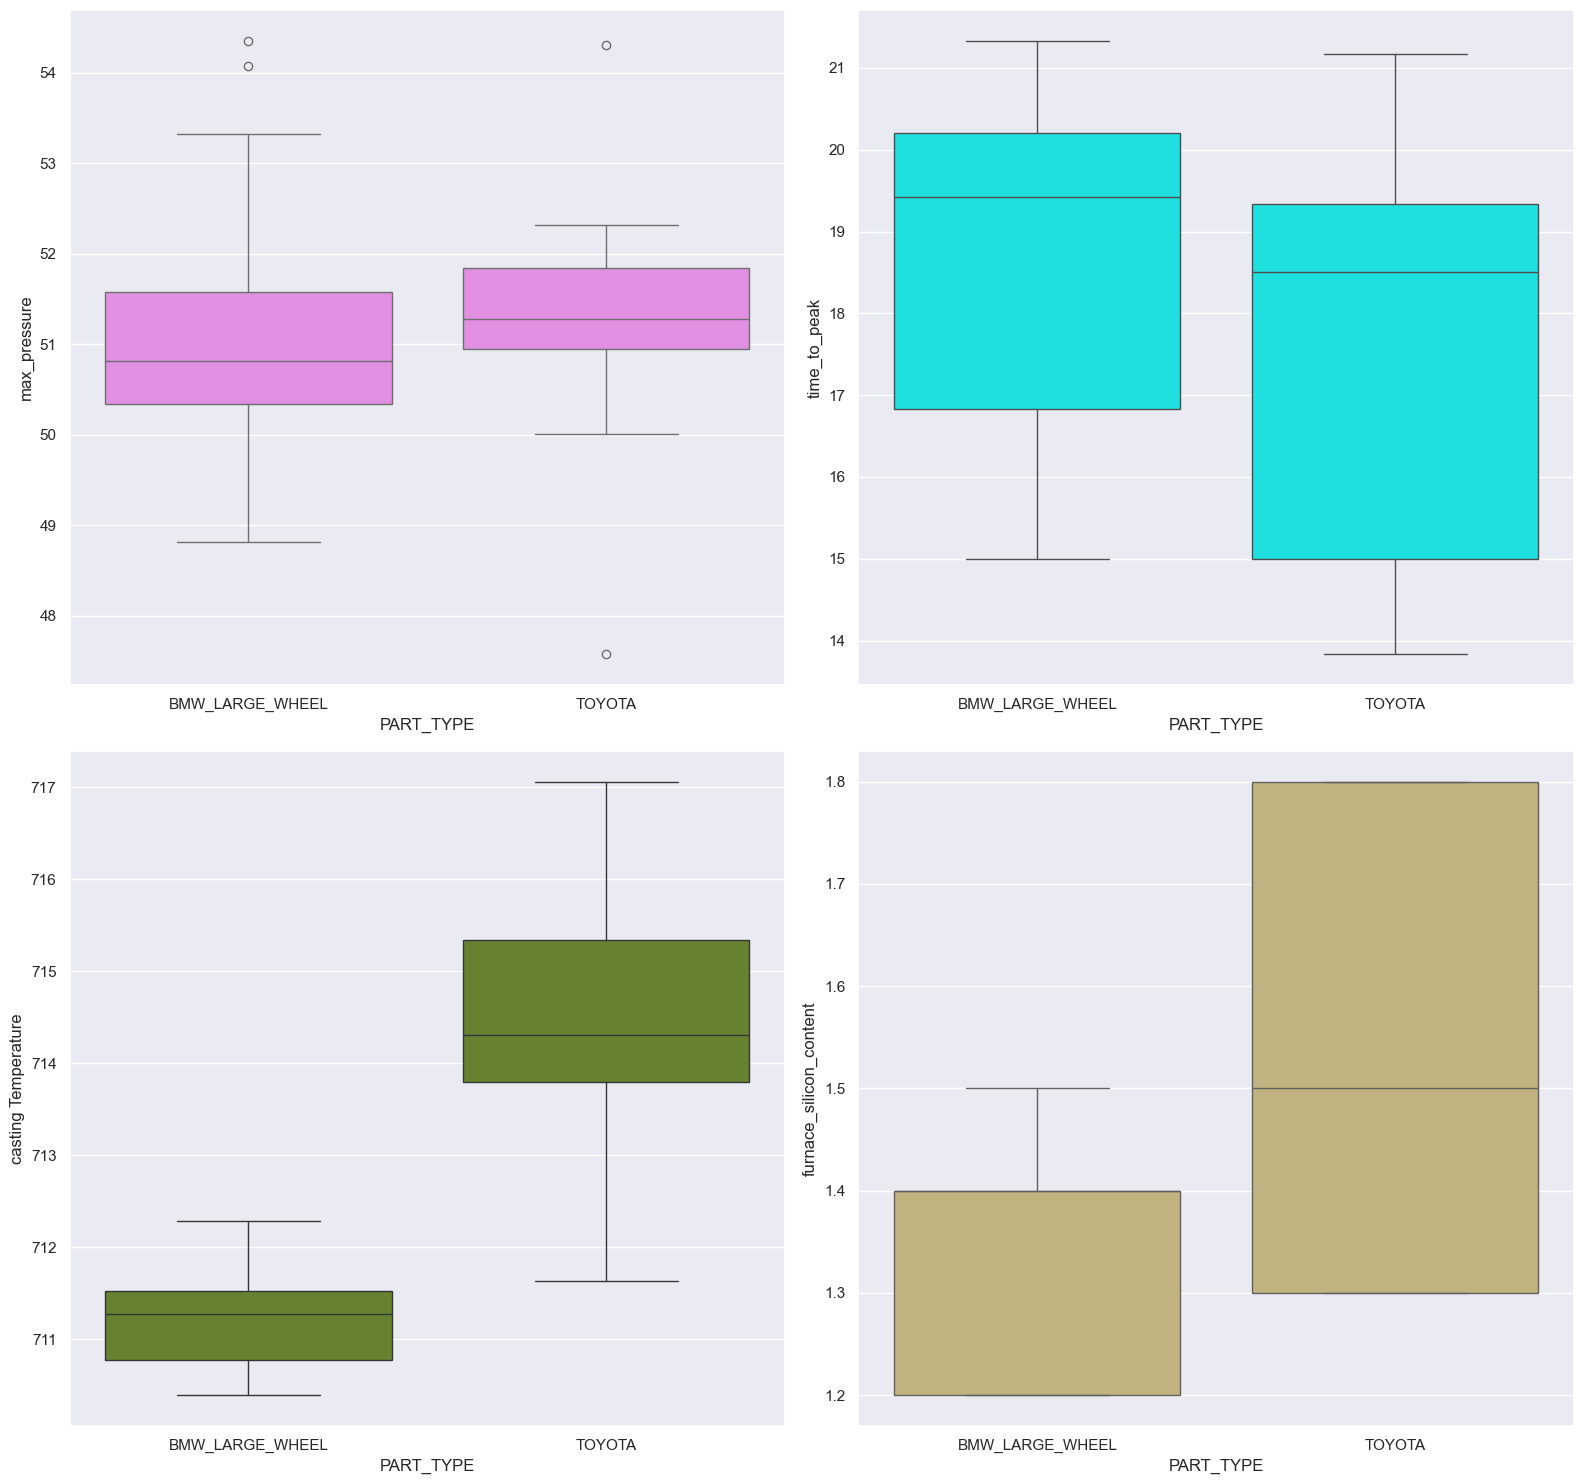




# lets compare the box plots between part types

# ---------------max_pressure plots:
> both plots have outliers (potential quality control issues).
> TOYOTA part type has a higher median (central tendency) than BMW_LARGE_WHEEL part type.
> This means that TOYOTA parts are reaching higher pressures compared to BMW parts
> There is more variation in BMW_LARGE_WHEEL part type pressures compared to TOYOTA (evident by box length)
> so BMW_LARGE_WHEEL part type is less consistent in maintaing pressures
> the whiskers show that BMW_LARGE_WHEEL part type has a higher spread of data than Toyota
> the medians for both parts indicates lower skewness (there are pressures shifting the distribution to the left)

# ---------------time to peak plots:
> there are no outliers in the time_to_peak boxplots for both part types.
> BMW_LARGE_WHEEL has a higher median than TOYOTA.This means BMW_LARGE_WHEEL can take longer time to reach max pressure
> there is more variation in TOYOTA time_to_peak values(l

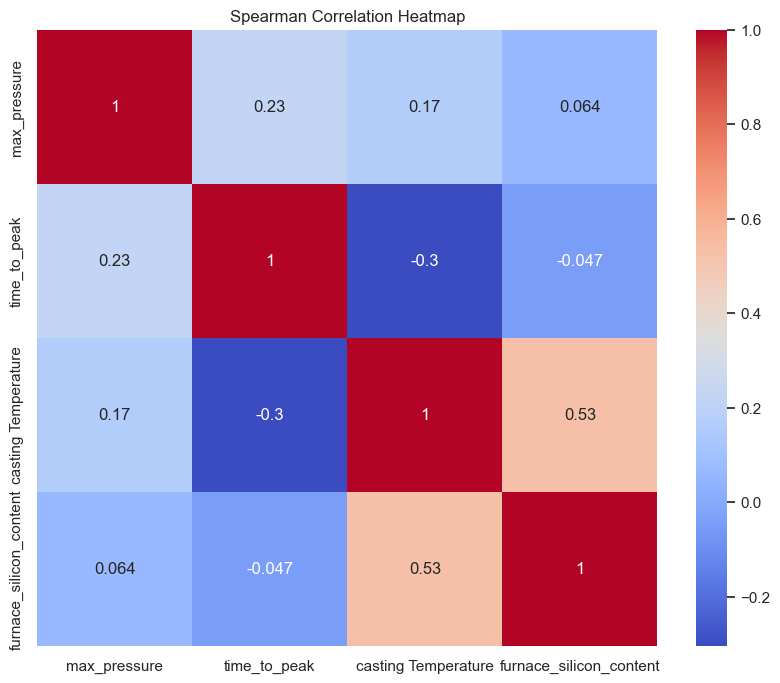



    
# the correlation shows monotonic relationship with furnace_silicon_content and casting temperature
# this help choose correct model during fitting and also help with deciding if PCA is necessary to reduce the dimensional space
# by removing redundant features
# there is a bit of relationship between max pressure and time to peak
# also max pressure and casting temperature

#---------relationship between silcon content and casting temperature
# Generally allows for a lower casting temperature.
#This is because silicon enhances the fluidity of the molten metal,
# making it easier to cast at lower temperatures
# this is evident by the time series plot trends - as Toyota silicon content drop, casting T increases
# as BMW silicon content increases, casting temperature decreases
# also this explains the fundamental difference between the Toyota and BMW parts identified through statistical tests



-----------------MUTUAL INFORMATION AND VIF SCORE-------------------

                 

In [1]:

#------------------PART 1 - Developing a unified view------------------------

#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import mannwhitneyu
from scipy import stats
from statsmodels.tsa.stattools import adfuller


# an alternative approach to below problem would be to use SQLite within python 
# in this case, will use functions with .apply method instead to reach end result

def build_unified_view() -> pd.DataFrame:

    #-------------------------Production Data-----------------------------------------------------------------

    #import production data
    production_data_df = pd.read_parquet("production_logging_data.parquet")

    # forward fill to assign part types to the part id's
    # produces dense output - no missing values
    production_data_df['PART_TYPE'] = production_data_df['PART_TYPE'].ffill()

    # remove the header row used to assign part type 
    production_data_df = production_data_df[production_data_df['unique_part_identifer'].notna()]

    #-----------------------Pressure Data----------------------------------------------------------------------

    # import pressure data
    pressure_data_df = pd.read_parquet("pressure_data.parquet")

    # the date column is the index - need to reset so that this column can be accessed for further analysis
    # reset_index moves index column to a new column called "index"
    # drop = false, makes the old index appear in new column as opposed to dropping index completely
    pressure_data_df = pressure_data_df.reset_index(drop=False, inplace=False)

    # Rename "index" column to "Timestamp"
    pressure_data_df.columns = ['Timestamp', 'pressure_sensor']

    # We will need to define what characterises a cycle i.e. the start to end of casting
    # a (pressure value >0) followed by a (pressure value = 0) indicates the start of a cycle
    # the first (Pressure value = 0) after a (pressure value> 0) indicates the end of the cycle (reset)

    # Define cycle start and end based on pressure value transitions
    # creating a new column called "pressure_is_zero" in the dataframe to find all values where "pressure = 0" and returns "True" or "False"
    # creating a column call "prev_Pressure_is_zero" that will be a shift of the "pressure_is_zero" column one row down
    # fill_value = False if there is a nan entry 
    pressure_data_df['pressure_is_zero'] = pressure_data_df['pressure_sensor'] == 0
    pressure_data_df['prev_pressure_is_zero'] = pressure_data_df['pressure_is_zero'].shift(1, fill_value=False)  

    # Checking if current pressure is greater than zero and the previous value was a zero (since shifted the zero column one down)
    pressure_data_df['cycle_start'] = (pressure_data_df['pressure_sensor'] > 0) & (pressure_data_df['prev_pressure_is_zero'] == True)

    # Define a cycle end as a zero pressure experienced after the previous pressure value was non-zero
    pressure_data_df['cycle_end'] = (pressure_data_df['pressure_sensor'] == 0) & (pressure_data_df['prev_pressure_is_zero'] == False)

    # This cumulative sum effectively provides a unique identifier for each cycle, 
    # as a cycle start or end is identified, the cumulative sum increases by 1
    # this creates a new unique cycle_id that is updated with the new cumulative sum value
    # below will capture all cycles including false starts
    pressure_data_df['cycle_id'] = (pressure_data_df['cycle_start'] | pressure_data_df['cycle_end']).cumsum()

    # Upon looking at the data - it is seen that there are cases where there are false starts
    # i.e. there is a change from "0" pressure to "pressure>0" and back to "0" pressure
    # with a cycle time that is shorter than a typical casting cycle
    # these anomalies will be dealt with below to prevent false cycles from being included
    # analyzing the data of the intial cycles start and end time show that any cycle < 18 min is a false start
    # Notes said most casting cycles are around 30 min - however used 18 min as a safety measure to capture all true cycles
    threshold_time = 18

    # Groupby groups all cycle_ids in the pressure_data_df dataframe
    # performs an summary operation on each group timestamp using aggregate function
    # it calculates the max and min timestamp value for each cycle
    # cycle_time_df dataframe then has two columns with the min and max timestamps for each cycle
    cycle_time_df = pressure_data_df.groupby('cycle_id').agg({'Timestamp': ['min', 'max'],})

    # rename column names for ease of use
    cycle_time_df.columns = ['cycle_start', 'cycle_end']

    # Calculate the duration for each cycle in minutes
    # the difference between the 2 timestamps is calculated
    # dt is a datetime accessor which allows calculation of total seconds which is divided by 60 to get the value in minutes
    # resulting output is stored in cycle_time_df in column "cycle_duration"
    cycle_time_df['cycle_duration'] = (cycle_time_df['cycle_end'] - cycle_time_df['cycle_start']).dt.total_seconds() / 60

    # Filter out cycles (False cycles) where the duration is less than the threshold time
    # valid_cycles dataframe will contain values where the cycle_duration is >18 min
    # index function references the viable cycle indexes and masks the original cycle_time_df dataframe, to return only applicable values
    valid_cycles = cycle_time_df[cycle_time_df['cycle_duration'] >= threshold_time].index

    # Apply the filter back to the original dataframe to only keep cycle_ids that are in the valid_cycles dataframe
    pressure_data_df = pressure_data_df[pressure_data_df['cycle_id'].isin(valid_cycles)]

    # Reset index to start from 0
    # drop = true as the old index does not need to be a new column in dataframe
    # inplace = true to make changes on existing dataframe
    pressure_data_df.reset_index(drop=True, inplace=True)

   # Function to find max pressure, time to peak, and timeframes for each valid cycle
   # the "group" placeholder is used to received buckets containing each of the cycle_id pressure values 
   # this placeholder is created by the .apply method 
   
    def extract_max_pressure(group):
        
       # for each cycle_id bucket it is applied to, the group function will find the max pressure
       max_pressure = group['pressure_sensor'].max()
       
       # for each cycle it is applied to, the function will find the timestamp the max pressure belonged to
       # it will first use idxmax to find the max id corresponding to max pressure,
       # then the loc function will associate the ID with the timestamp in the Timestamp column
       max_pressure_time = group.loc[group['pressure_sensor'].idxmax(), 'Timestamp']

       # locates first timestamp corresponding to start of the cycle
       start_time = group['Timestamp'].iloc[0]

       # the elapsed time is defined as the time in minutes from the start time to max pressure time
       # converting to seconds then minutes
       elapsed_time = (max_pressure_time - start_time).total_seconds() / 60.0  

       #output of model for each group will go back into original dataframe
       # that .append is used on i.e. the cycle_results dataframe
       return pd.Series({
         # values to be returned
         'max_pressure': max_pressure,
         'time_to_peak': elapsed_time,
         'cycle_start': start_time,
         'max_pressure_time': max_pressure_time,

    })

    # use .apply method to apply extract_max_pressure function to each valid cycle group
    # this prevents looping through and passing individual values to the function - .apply is faster and more concise
    # groupby lumps all the pressure values per cycle_id and .apply and calls the function for each "group"
    # group_keys = false, prevents the cycle_ids from being added to the dataframe
    # reset index to re-align index values
    cycle_results = pressure_data_df.groupby('cycle_id', group_keys=False).apply(extract_max_pressure, include_groups=False).reset_index()

    # Merge the results with the original dataframe - so that each part is grouped with it's appropriate cycle_id
    # use join on cycle_id
    pressure_data_df = pressure_data_df.merge(cycle_results, on='cycle_id', how='left')

    # drop unnecessary columns from merged dataframe
    # after merge cycle_start_X and cycle_start_y values created
    # cycle_start_y(duplicate) removed together with other unncessary columns
    pressure_data_df = pressure_data_df.drop(['pressure_sensor','cycle_id','pressure_is_zero','prev_pressure_is_zero','cycle_start_x','cycle_end','Timestamp','max_pressure_time'], axis=1)

    # Merge product and pressure dataframes
    # Ensure both DataFrames have 'Timestamp' in datetime format
    pressure_data_df['cycle_start_y'] = pd.to_datetime(pressure_data_df['cycle_start_y'])
    production_data_df['cycle_start_timestamp'] = pd.to_datetime(production_data_df['cycle_start_timestamp'])

    # Convert both columns to nanoseconds to ensure compatibility of matching column -nano seconds for accuracy
    pressure_data_df['cycle_start_y'] = pressure_data_df['cycle_start_y'].astype('datetime64[ns]')
    production_data_df['cycle_start_timestamp'] = production_data_df['cycle_start_timestamp'].astype('datetime64[ns]')

    # Merge pressure data into production log on the timestamp (or nearest)
    # merge_asof lets you match on approximate values
    unified_view_1 = pd.merge_asof(production_data_df.sort_values('cycle_start_timestamp'),
                             pressure_data_df.sort_values('cycle_start_y'),
                             left_on='cycle_start_timestamp',
                             right_on='cycle_start_y',
                             direction='nearest')

    # want only the production_log timestamp so can drop the pressure_log timestamp
    unified_view_1 = unified_view_1.drop(columns=['cycle_start_y'])

     #----------------------Temperature Data----------------------------------------------------------------------

    casting_temperature_data_df = pd.read_parquet("casting_temperature_data.parquet")

    # the date column is the index - need to reset to access column for further analysis
    casting_temperature_data_df = casting_temperature_data_df.reset_index(drop=False, inplace=False)

    # rename timestamp column
    casting_temperature_data_df.columns = ['TempTime', 'casting Temperature']

    # Convert to datetime and nanoseconds format to prevent errors in merging
    casting_temperature_data_df['TempTime'] = pd.to_datetime(casting_temperature_data_df['TempTime'])
    casting_temperature_data_df['TempTime'] = casting_temperature_data_df['TempTime'].astype('datetime64[ns]')

    # Interpolate missing values based on the time series data
    # values seem similar, instead of dropping, will instead imputate
    # interpolated values might be more applicable and saves data points
    # linear interpolation will be done
    casting_temperature_data_cleaned_df = casting_temperature_data_df.interpolate(method='linear')

    # Merge temperature data into unified_view_1
    # will use forward direction merge, as it is stipulated that temperature readings are taken within first 10 min
    # so preceding value will be applicable
    unified_view_2 = pd.merge_asof(unified_view_1.sort_values('cycle_start_timestamp'),
                             casting_temperature_data_cleaned_df.sort_values('TempTime'),
                             left_on='cycle_start_timestamp',
                             right_on='TempTime',
                             direction='forward')

    # drop unnecessary columns like the casting temperature timestamp
    unified_view_2 = unified_view_2.drop(columns=['TempTime'])

    #----------------------Furnace Data----------------------------------------------------------------------

    furnace_data_df = pd.read_parquet("furnace_silicon_data.parquet")

    # the date column is the index - need to reset to access column for further analysis
    furnace_data_df = furnace_data_df.reset_index(drop=False, inplace=False)

    # rename timestamp column
    furnace_data_df.columns = ['FurnaceTime', 'furnace_silicon_content']

    # convert furnace timestamp to date time format and nanoseconds
    furnace_data_df['FurnaceTime'] = pd.to_datetime(furnace_data_df['FurnaceTime'])
    furnace_data_df['FurnaceTime'] = furnace_data_df['FurnaceTime'].astype('datetime64[ns]')

    # Merge temperature data into unified_view_2 to create final output
    # use direction = "backward" to respect 4 hr interval
    unified_view_Final = pd.merge_asof(unified_view_2.sort_values('cycle_start_timestamp'),
                             furnace_data_df.sort_values('FurnaceTime'),
                             left_on='cycle_start_timestamp',
                             right_on='FurnaceTime',
                             direction='backward')  


    unified_view_Final = unified_view_Final.drop(columns=['FurnaceTime'])

    # final output from function
    return unified_view_Final

print("------------------------------UNIFIED VIEW--------------------------------\n")

# load and save function as a dataframe "unified_view"
# consists of columns:
#    - max_to_peak = time to reach max pressure
#    - max_pressure = maximum casting pressure reached for cycle
#    - furnace_silicon_content = silicon content in furnace during cycles
#    - casting Temperature = temperature for casting cycles
# Set option to display all columns

pd.set_option('display.max_columns', None)
unified_view = build_unified_view()
print(unified_view.head(10))

# -------- PART 2 - Exploratory Data Analysis (EDA)---------------------

print("\n--------------------------DATA UNDERSTANDING------------------------------\n")

# Check the datatype of each column to identify if columns have numerical or categorical variables
print(f"DataTypes:\n{unified_view.dtypes}")

print("""
> data contains a mix of categorical (unique_part_identifer, PART_TYPE)
> and continuous numerical data (max_pressure, time_to_peak ,casting Temperature,furnace_silicon_content)
> datetime object (cycle_start_timestamp)
""")

# Find the number of rows and columns the dataset contains
print(f"Shape: {unified_view.shape}")

print("""
> as can be seen the dataset contains a total of 49 rows and 7 columns
""")

# check for missing or null values
nulls = unified_view.isnull().sum()
print(f"nulls:\n{nulls}")

print("""
> as can be seen, there are no missing values
> these were handled using interpolation in the preceding steps for the casting temperature data
\n
""")

print("--------------------------------COUNTPLOT OF PART TYPE ---------------------------------\n")

# tuple with width and height (8 inches by 6 inches)
# calling matplotlib instance plt to create a figure space to hold subplots
plt.figure(figsize=(8, 6))
# use seaborne countplot: x = part type, data = dataframe, palette sets the colors of the bars
ax = sns.countplot(x='PART_TYPE', data=unified_view,palette=['#432371',"#FAAE7B"],hue='PART_TYPE')

# set title and labels
plt.title('Count of Part Types')
plt.xlabel('Part Type')
plt.ylabel('Count')

# Add the values on top of the bars
# p represents each bar - the height(y-value) will be extracted and positioned
# on top of each bar in the designated positioning
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}',
            ha='center', va='bottom')

# display plot area
plt.show()

print("""
\n
# there seems to be more Toyota than BMW parts produced during the period
# either Totota parts have shorter cycle times, are less complex to make or are in higher volume
# all part ID's are unique so one of each part
# Toyota (29 parts) and BMW_LARGE_WHEEL(20 parts)
\n
""")

print("-----------------------------DESCRIPTIVE STATISTICS--------------------------------------\n")

# lets have a look at the descriptive statistics
print(unified_view.describe())

print("""
\n
# There are 49 unique entries or cycles in the table (49 parts)

#---------------max pressure
> 25%: 25% of the cycles have a maximum pressure less than or equal to 50.65.
> 50% (Median): 50% of the cycles have a maximum pressure less than or equal to 51.22.
> 75%: 75% of the cycles have a maximum pressure less than or equal to 51.80.
> the highest pressure reached during a casting cycle was 54.3
> and this highest pressure was reached within 21.33 min of the cycle
> on average the max pressure is 49
> it takes on average 18 minutes to reach max pressure during casting

#--------------time_to_peak
> 25%: 25% of the cycles reach peak pressure in less than or equal to 15.67 minutes.
> 50% (Median): 50% of the cycles reach peak pressure in less than or equal to 18.50 minutes.
> 75%: 75% of the cycles reach peak pressure in less than or equal to 19.83 minutes.
> the max time to peak is 21.33 minutes and this corresponds to the highest max_pressure
> the average time to peak is 17.89 minutes

#-------------casting temperature
> 25%: 25% of the cycles have a casting temperature less than or equal to 711.43.
> 50% (Median): 50% of the cycles have a casting temperature less than or equal to 713.15.
> 75%: 75% of the cycles have a casting temperature less than or equal to 714.73.
> highest casting temperature reached is 717.06
> the average casting temperature is 713.13

#---------------furnace_silicon_content
> 25%: 25% of the cycles have silicon content less than or equal to 1.30.
> 50% (Median): 50% of the cycles have silicon content less than or equal to 1.40.
> 75%: 75% of the cycles have silicon content less than or equal to 1.50.
> the average silicon furnace contents is 1.45
> max silicon content recorded is 1.80
> the lowest silicon content recorded is 1.20

#-------------- cycle_timestamps
> The earliest cycle starts at 2024-01-15 00:00:00.
> 25%: 25% of the cycles start by 2024-01-15 06:00:00.
> 50% (Median): 50% of the cycles start by 2024-01-15 12:00:00.
> 75%: 75% of the cycles start by 2024-01-15 18:00:00.
> The latest cycle starts at 2024-01-16 00:00:00

> Measure of spread(dispersion) - the std deviation gives an indication of how much the values deviated from mean
> from the data - the highest variability seems to be from time to peak and casting temperature
> time to peak values deviate from the mean by about 2.33 units on average and casting temperature 1.93
> the lowest variability is seen by the silicon furnace content at 0.190506
\n
""")

print("# find part and part types corresponding to the min and max")
print("# deviations can be investigated to fix process issues\n")

# Find the max values
mp_value = unified_view['max_pressure'].max()
mt_value = unified_view ['casting Temperature'].max()
ms_value = unified_view ['furnace_silicon_content'].max()

# Find the min values
minp_value = unified_view['max_pressure'].min()
mint_value = unified_view ['casting Temperature'].min()
mins_value = unified_view ['furnace_silicon_content'].min()

# Filter the DataFrame to get the rows with the maximum values
mp_row = unified_view[unified_view['max_pressure'] == mp_value]
mt_row = unified_view[unified_view['casting Temperature'] == mt_value]
ms_row = unified_view[unified_view['furnace_silicon_content'] == ms_value]

# Filter the DataFrame to get the rows with the minimum values
minp_row = unified_view[unified_view['max_pressure'] == minp_value]
mint_row = unified_view[unified_view['casting Temperature'] == mint_value]
mins_row = unified_view[unified_view['furnace_silicon_content'] == mins_value]

# Extract the unique_part_identifer and PART_TYPE for max values
max_pressure_details = mp_row[['unique_part_identifer', 'PART_TYPE']]
max_casting_temperature = mt_row[['unique_part_identifer', 'PART_TYPE']]
max_silicon_content = ms_row[['unique_part_identifer', 'PART_TYPE']]

# Extract the unique_part_identifer and PART_TYPE for min values
min_pressure_details = minp_row[['unique_part_identifer', 'PART_TYPE']]
min_casting_temperature = mint_row[['unique_part_identifer', 'PART_TYPE']]
min_silicon_content = mins_row[['unique_part_identifer', 'PART_TYPE']]

# max value details
# max pressure/time to peak was achieved for part ID - uid_11297 for BMW_LARGE_WHEEL part type (index 12)
print(f"Max Pressure Value: {mp_value}\nDetails:\n{max_pressure_details}\n")
# max casting temperature was achieved for part ID - uid_11333 for TOYOTA part type (index 48)
print(f"Max Temperature Value: {mt_value}\nDetails:\n{max_casting_temperature}\n")
# max silicon content for Totota parts ( uid_11325 - uid_11332)
print(f"Max Silicon Value: {ms_value}\nDetails:\n{max_silicon_content}\n")


# min value details
# min pressure/time to peak was achieved for part ID - uid_11320 for TOTOTA part type (index 35)
print(f"Min Pressure Value: {minp_value}\nDetails:\n{min_pressure_details}\n")
# min casting temperature was achieved for part ID - uid_11298 for BMW_LARGE_WHEEL part type (index 13)
print(f"Min Temperature Value: {mint_value}\nDetails:\n{min_casting_temperature}\n")
 # min silicon content for( uid_11285 - uid_11292)  BMW_LARGE_WHEEL part type
print(f"Min Silicon Value: {mins_value}\nDetails:\n{min_silicon_content}\n")
#these parts can be examined further if they deviate significantly

print("----------------------DESCRIPTIVE STATISTICS BY PART TYPE---------------------------\n")
#lets separate the part types and see if there are differences

# splitting the dataframe into 2 parts
# on basis of 'part type
# assign two new dataframes to hold values for each part type

df_Toyota = unified_view[unified_view['PART_TYPE'] == 'TOYOTA']
df_BMW = unified_view[unified_view['PART_TYPE'] == 'BMW_LARGE_WHEEL']
pd.set_option('display.max_columns', None)

print(df_BMW.describe())

print(df_Toyota.describe())

print("""
\n
> comparisons between critical data for BMW parts and Toyota Parts
> max pressure reached for Toyota and BMW more or less the same at 54.2 (interestingly it take 17 min to reach this pressure for Toyota)
> and around 21 min to reach this pressure for BMW - indicating issues of inefficiency in reaching max pressure
> average time_to_peak for BMW is also higher than Toyota pointing again to issues with reaching max pressures
> Min pressures reached for Toyota and BMW simiar at around 48.8
> the max pressure means are also quite close
> however the mean casting temperature for Toyota parts is 3 points higher for BMW -could be due to outliers
> Toyota and BMW casting temperature min values are similar - however Toyota max value exceeds BMW at 717 vs 712
> the mean silicon content is also higher for Toyota at 1.52 vs BMW 1.34
> can use the above method to find the corresponding parts associated with each min and max value
> these parts can be examined further for differences from other parts
\n
""")

# comparing CV's (since means are not the same for BMW and Toyota parts can't directly compare std - will normalize to coefficient of variation and compare)

CV_Pressure_Toyota = df_Toyota['max_pressure'].std() / df_Toyota['max_pressure'].mean()
CV_Pressure_BMW = df_BMW['max_pressure'].std() / df_BMW['max_pressure'].mean()
CV_Peak_Time_Toyota = df_Toyota['time_to_peak'].std() / df_Toyota['time_to_peak'].mean()
CV_Peak_Time_BMW = df_BMW['time_to_peak'].std() / df_BMW['time_to_peak'].mean()
CV_Silicon_Toyota = df_Toyota['furnace_silicon_content'].std() / df_Toyota['furnace_silicon_content'].mean()
CV_Silicon_BMW = df_BMW['furnace_silicon_content'].std() / df_BMW['furnace_silicon_content'].mean()
CV_casting_temp_Toyota = df_Toyota['casting Temperature'].std() / df_Toyota['casting Temperature'].mean()
CV_casting_temp_BMW = df_BMW['casting Temperature'].std() / df_BMW['casting Temperature'].mean()


print(f"CV Pressure Toyota: {CV_Pressure_Toyota}, CV Pressure BMW: {CV_Pressure_BMW}")
print(f"CV TimePeak Toyota: {CV_Peak_Time_Toyota}, CV TimePeak BMW: {CV_Peak_Time_BMW}")
print(f"CV FurnaceContent Toyota: {CV_Silicon_Toyota}, CV FurnaceContent BMW: {CV_Silicon_BMW}")
print(f"CV Casting Temperature Toyota: {CV_casting_temp_Toyota}, CV Casting Temperature BMW: {CV_casting_temp_BMW}\n") # similar variation

print("""
> seems to be higher variation in pressures for BMW parts
> seems to be higher variation in time to peak in Toyota Parts
> seems that silicon furnace content for Toyota has more variation than BMW
> similar variation for casting temperature    
\n  
""")

print("\n----------------------------SHAPE OF DATA-------------------------------------------\n")

#plot histograms
# Set seaborn plotting aesthetics as default
sns.set()

# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 15))

# Create histograms in each subplot
sns.histplot(data=unified_view, x='max_pressure', bins=20, kde=True, ax=axes[0, 0],color='purple')
axes[0, 0].set_title('Histogram of Max Pressure')

sns.histplot(data=unified_view, x='time_to_peak', bins=20, kde=True, ax=axes[0, 1],color='olive')
axes[0, 1].set_title('Histogram of Time to Peak')

sns.histplot(data=unified_view, x='casting Temperature', bins=20, kde=True, ax=axes[1, 0],color='coral')
axes[1, 0].set_title('Histogram of Casting Temperature')

sns.histplot(data=unified_view, x='furnace_silicon_content', bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Furnace Silicon Content')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

print("""
\n
> max pressure data looks normally distributed as there seems to be a bell curve,
> however statstical tests for all distributions will be done to confirm
> the rest of the columns exhibit skewness and dont follow a normal distributionm
> casting temperature and time_to_peak looks slightly bimodal
> this will pose issues during model development if these features were to be used for prediction
> some models like linear regression require normal data
> normalization and feature scaling (e.g. StandardScaler or Min Max method) would have to be used as part of pre-processing
> for parametric hypothesis testing and stastical testing - normal data is required as well
\n
""")

print("--------------------------------DATA STABILITY-------------------------------------\n")

# before doing stastical tests to verify normality - stability needs to be determined
# do time series plots

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # 2 rows, 2 columns, with a larger figure size

# Plot the first time series in the top-left subplot
# Define the color for the line

axes[0, 0].plot(unified_view.cycle_start_timestamp, unified_view.max_pressure,color ='blue')
axes[0, 0].set_title('Time Series: Max Pressure')
axes[0, 0].set_xlabel('Timestamp')
axes[0, 0].set_ylabel('Max Pressure')
axes[0, 0].tick_params(axis='x', rotation=30)

# Plot the second time series in the top-right subplot
axes[0, 1].plot(unified_view.cycle_start_timestamp, unified_view.time_to_peak,color='green')
axes[0, 1].set_title('Time Series: Time to Peak')
axes[0, 1].set_xlabel('Timestamp')
axes[0, 1].set_ylabel('Time to Peak')
axes[0, 1].tick_params(axis='x', rotation=30)

# Plot the third time series in the bottom-left subplot
axes[1, 0].plot(unified_view.cycle_start_timestamp, unified_view['casting Temperature'],color='red')
axes[1, 0].set_title('Time Series: Casting Temperature')
axes[1, 0].set_xlabel('Timestamp')
axes[1, 0].set_ylabel('Casting Temperature')
axes[1, 0].tick_params(axis='x', rotation=30)

# Plot the fourth time series in the bottom-right subplot
axes[1, 1].plot(unified_view.cycle_start_timestamp, unified_view.furnace_silicon_content,color='black')
axes[1, 1].set_title('Time Series: Furnace Silicon Content')
axes[1, 1].set_xlabel('Timestamp')
axes[1, 1].set_ylabel('Furnace Silicon Content')
axes[1, 1].tick_params(axis='x', rotation=30)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plots
plt.show()

print("""
\n
> graphs show alot of special causes in the process (alot of instability)
> Common cause(random variation) is variation caused by unknown factors
> It creates a steady but random distribution of output around the average of the data. It usually follows the normal distribution.
> However here special cause variation (non-random variation) seems to be present
> casting Temperature and time_to_peak plots show alot of short term variability indicating noise in the process
> This is seconded by the std deviation calculated above
> The casting temperature profile indicates an upward trend - it seems that the casting temperature is increasing over time
> This is indicating change/abnormality in the process
> the casting temperature profile indicates rapid change
> the furnace_silicon_content profile indicates a cyclic trend - this is because of the long periods (every 4 hours) recording
> there is a sudden spike of silicon content which may be as a result of incorrect silicon addition/dosing
> this can affect cost and product quality since this is not in the typical range of addition
\n
""")

print("-----------------------------DATA TRANSFORMATION------------------------------------\n")

# the data shows that the features are unstable which means that a normality statistical test would fail
# an attempt to normalize the data with a Yeo Johnson transformation to see if there is an inherent normal distribution
# Apply Yeo_johnson transformation on columns before stastistical normality test
# Yeo Johnson more suitable for small variations between data points as is the case

transformed_data, lam1 = stats.yeojohnson(unified_view['max_pressure'])
transformed_data_2, lam2 = stats.yeojohnson(unified_view['time_to_peak'])
transformed_data_3, lam3 = stats.yeojohnson(unified_view['casting Temperature'])
transformed_data_4, lam4 = stats.yeojohnson(unified_view['furnace_silicon_content'])


# Create a new DataFrame with the transformed data
unified_view_transformed = pd.DataFrame({
    'unique_part_identifier': unified_view['unique_part_identifer'],
    'transformed_max_pressure': transformed_data,
    'transformed_time_to_peak': transformed_data_2,
    'transformed_casting_Temperature': transformed_data_3,
    'transformed_furnace_silicon_content': transformed_data_4
})

# Display the first 10 rows of the new DataFrame
print(unified_view_transformed.head(10))

print("\n-------------------------------STATIONARY TEST---------------------------------------\n")

# check stationarity to check stability after transformation (works better on transformed data)

series1 =unified_view_transformed['transformed_max_pressure']
series2 =unified_view_transformed['transformed_casting_Temperature']
series3 =unified_view_transformed['transformed_time_to_peak']
series4 =unified_view_transformed['transformed_furnace_silicon_content']

# Augmented Dickey-Fuller (ADF) Test for stationarity
adf_result_max_pressure = adfuller(series1, autolag='AIC')
adf_result_casting_temperature = adfuller(series2, autolag='AIC')
adf_result_time_to_peak = adfuller(series3, autolag='AIC')
adf_result_furnace_silicon_content = adfuller(series4, autolag='AIC')

# Print ADF Statistics and p-values
print("ADF Statistic for max_pressure:", adf_result_max_pressure[0])
print("p-value for max_pressure:", adf_result_max_pressure[1])
print("\nADF Statistic for casting_temperature:", adf_result_casting_temperature[0])
print("p-value for casting_temperature:", adf_result_casting_temperature[1])
print("\nADF Statistic for time_to_peak:", adf_result_time_to_peak[0])
print("p-value for time_to_peak:", adf_result_time_to_peak[1])
print("\nADF Statistic for furnace_silicon_content:", adf_result_furnace_silicon_content[0])
print("p-value for furnace_silicon_content:", adf_result_furnace_silicon_content[1])

print("""
\n
#hypothesis testing
> Ho - data is stationary (null hypothesis)
> H1: data is not stationary (alternative hypothesis)

# after transformation
> P-value <0.05 for max_pressure and time_to_peak indicating stability (data is stationary)
> P-value >0.05 for casting_temperature and furnace_silicon_content (data is not stationary)
> max_pressure and time to peak only stabilized
\n
""")

print("-----------------------------------TEST FOR NORMALITY-------------------------------\n")

# do statistical normality test on the transformed data to determine if there is normality

max_normal = unified_view_transformed['transformed_max_pressure']
casting_normal = unified_view_transformed['transformed_casting_Temperature']
furnace_content = unified_view_transformed['transformed_furnace_silicon_content']
time_to_peak = unified_view_transformed['transformed_time_to_peak']

# Perform Shapiro-Wilk test
stat1, p1 = shapiro(max_normal)
stat2, p2 = shapiro(casting_normal)
stat3, p3 = shapiro(furnace_content)
stat4, p4 = shapiro(time_to_peak)

# Print results
print('Statistic max pressure=%.3f, p=%.3f' % (stat1, p1))
print('Statistic casting Temperature=%.3f, p=%.3f' % (stat2, p2))
print('Statistic furnace silicon content=%.3f, p=%.3f' % (stat3, p3))
print('Statistic time_to_peak=%.3f, p=%.3f' % (stat4, p4))

print("""
\n
# Interpretation
> p<0.05 for max_pressure therefore reject null hypothesis - data is not normal
> test statistic is close to 1, indicates that the data shows some characteristics of normality but is not normal
> p<0.05 for casting Temperature therefore reject the null hypothesis - data is not normal
> test statistic close to 1, data shows some characteristics of normality but is not normal
> p<0.05 for furnace silicon content therefore reject the null hypothesis - data is not normal,
> test statistic close to 1, data shows some characteristics of normality but is not normal
> p<0.05 for time_to_peak therefore reject the null hypothesis - data is not normal,
> test statistic close to 1, data shows some characteristics of normality but is not normal
> even after transformation, the data still shows non-normal distribution
> which means there is something wrong in the process (special causes) that needs to be corrected
> or the process in itself follows a non-normal distribution
\n
""")

print("--------------------SHAPE OF DATA (BY PART) ---------------------\n")

# plot histograms for each part type

# Define plotting region ( 4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(16, 15))

# Create histograms in each subplot
sns.histplot(data=df_Toyota, x='max_pressure', bins=20, kde=True, ax=axes[0, 0],color='firebrick')
axes[0, 0].set_title('Histogram of Max Pressure Toyota')

sns.histplot(data=df_BMW, x='max_pressure', bins=20, kde=True, ax=axes[0, 1],color='firebrick')
axes[0, 1].set_title('Histogram of Max Pressure BMW')

sns.histplot(data=df_Toyota, x='casting Temperature', bins=20, kde=True, ax=axes[1, 0],color='forestgreen')
axes[1, 0].set_title('Histogram of Casting Temperature Toyota')

sns.histplot(data=df_BMW, x='casting Temperature', bins=20, kde=True, ax=axes[1, 1],color='forestgreen')
axes[1, 1].set_title('Histogram of Casting Temperature BMW')

sns.histplot(data=df_Toyota, x='time_to_peak', bins=20, kde=True, ax=axes[2, 0],color='orange')
axes[1, 0].set_title('Histogram of time to peak Toyota')

sns.histplot(data=df_BMW, x='time_to_peak', bins=20, kde=True, ax=axes[2, 1],color='orange')
axes[1, 1].set_title('Histogram of time to peak BMW')

sns.histplot(data=df_Toyota, x='furnace_silicon_content', bins=20, kde=True, ax=axes[3, 0])
axes[1, 0].set_title('Histogram of furnace silicon content Toyota')

sns.histplot(data=df_BMW, x='furnace_silicon_content', bins=20, kde=True, ax=axes[3, 1])
axes[1, 1].set_title('Histogram of Furnace Silicon Content BMW')



# Adjust layout for better spacing
plt.tight_layout()
plt.show()

print("""
\n
> all distribution are visually not normal
> no need to do normality tests to confirm - process was shown above
\n
""")

print("----------------------------DATA STABILITY (BY PART)------------------------------\n")

# do time series plots

# Create 2x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # 2 rows, 2 columns, with a larger figure size

# Plot the first time series in the top-left subplot
axes[0, 0].plot(df_Toyota.cycle_start_timestamp, df_Toyota.max_pressure,color='firebrick')
axes[0, 0].set_title('Time Series: Max Pressure Toyota')
axes[0, 0].set_xlabel('Timestamp')
axes[0, 0].set_ylabel('Max Pressure')
axes[0, 0].tick_params(axis='x', rotation=30)

# Plot the second time series in the top-right subplot
axes[0, 1].plot(df_BMW.cycle_start_timestamp, df_BMW.max_pressure,color='firebrick')
axes[0, 1].set_title('Time Series: Time Max Pressure BMW')
axes[0, 1].set_xlabel('Timestamp')
axes[0, 1].set_ylabel('Max Pressure')
axes[0, 1].tick_params(axis='x', rotation=30)

# Plot the third time series in the bottom-left subplot
axes[1, 0].plot(df_Toyota.cycle_start_timestamp, df_Toyota.time_to_peak,color='forestgreen')
axes[1, 0].set_title('Time Series: Time to Peak Toyota')
axes[1, 0].set_xlabel('Timestamp')
axes[1, 0].set_ylabel('Time To Peak')
axes[1, 0].tick_params(axis='x', rotation=30)

# Plot the fourth time series in the bottom-right subplot
axes[1, 1].plot(df_BMW.cycle_start_timestamp, df_BMW.time_to_peak,color='forestgreen')
axes[1, 1].set_title('Time Series: Time to Peak BMW')
axes[1, 1].set_xlabel('Timestamp')
axes[1, 1].set_ylabel('Time To Peak')
axes[1, 1].tick_params(axis='x', rotation=30)

# Plot the fourth time series in the bottom-right subplot
axes[2, 0].plot(df_Toyota.cycle_start_timestamp, df_Toyota.furnace_silicon_content,color='red')
axes[2, 0].set_title('Time Series: Furnace Silicon Content Toyota')
axes[2, 0].set_xlabel('Timestamp')
axes[2, 0].set_ylabel('Furnace Silicon Content')
axes[2, 0].tick_params(axis='x', rotation=30)

# Plot the fourth time series in the bottom-right subplot
axes[2, 1].plot(df_BMW.cycle_start_timestamp, df_BMW.furnace_silicon_content,color='red')
axes[2, 1].set_title('Time Series: Furnace Silicon Content BMW')
axes[2, 1].set_xlabel('Timestamp')
axes[2, 1].set_ylabel('Furnace Silicon Content')
axes[2, 1].tick_params(axis='x', rotation=30)

# Plot the fourth time series in the bottom-right subplot
axes[3, 0].plot(df_Toyota.cycle_start_timestamp, df_Toyota['casting Temperature'],color='blue')
axes[3, 0].set_title('Time Series: Casting Temperature Toyota')
axes[3, 0].set_xlabel('Timestamp')
axes[3, 0].set_ylabel('Casting Temperature')
axes[3, 0].tick_params(axis='x', rotation=30)

# Plot the fourth time series in the bottom-right subplot
axes[3, 1].plot(df_BMW.cycle_start_timestamp,df_BMW['casting Temperature'],color='blue')
axes[3, 1].set_title('Time Series: Casting Temperature BMW')
axes[3, 1].set_xlabel('Timestamp')
axes[3, 1].set_ylabel('Casting Temperature')
axes[3, 1].tick_params(axis='x', rotation=30)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plots
plt.show()

print("""
\n
> Time series plots show that max pressure for BMW parts fluctuates more than Toyota
> over time it has gotten worse - Toyota parts trend is fairly stable with limited noise on the short term
> despite more stability in the max pressure in Toyota - the time to peak still fluctuates
> this is indicating that there are issues in consistently reaching the max pressure
> furnace content for BMW parts shows a pattern of increase as silicon content decreases
> there seems to be a linear upward trend for casting temperature for Toyota parts
> this is indicating some issue in maintaining a constant temperature (possibly due to reduction in silicon content)
> silicon content lowers melting point of metal resulting in lower casting temperature having to be maintained
> this could result in possible quality issues and increased energy costs over time
> the casting temperature for BMW parts is also out of control - indicating poor temperature control in the casting process
\n
""")

print("-----------------------------BOX PLOTS-----------------------------------------\n")

# Box plots for important features

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2,figsize=(14, 10))

#create boxplot in each subplot
sns.boxplot(data=unified_view, y='max_pressure', ax=axes[0,0],color='skyblue')
sns.boxplot(data=unified_view, y='time_to_peak', ax=axes[0,1],color='lightgreen')
sns.boxplot(data=unified_view, y='casting Temperature', ax=axes[1,0],color='salmon')
sns.boxplot(data=unified_view, y='furnace_silicon_content', ax=axes[1,1],color='lightgrey')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

print("""
\n
# interpreting the results
> median(centre line) will give an indication of measures of location (central tendency)
> long whiskers indicate greater spread (into Q1(quartile 1) and Q3(quartile 3) regions)
> and short whiskers indicate points are closer to IQR (interquartile range)
> box length indicates variation in process
> max pressure box plot shows limited variation(box is not too long) and symmetric distribution (centered median line),
> however there are alot of outliers >54 and <49 for max pressure
> max_pressure box plot indicates no skewness,however whiskers do indicate some spread into the Q1 and Q3 ranges
> time to peak and casting temperature have no outliers but alot of variation (large box width),
> this is also noticeable on time series plots for time to peak and casting temperature
> median line of time_to_peak indicates top skewness (theres a few values stretching the distribution to the right)
> furnace_silicon_data has limited spread into Q3 upper quartile (no whisker) but values extending below the lower quartile (Q1)
> furnace_silicon_data distribution shows no skewness and variation is limited (small box width)
\n
""")

print("---------------------------BOX PLOTS (BY PART TYPES)----------------------------\n")

# lets do boxplots to look at the difference between part types and their associated variables

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2,figsize=(16, 15))

#create boxplot in each subplot
sns.boxplot(data=unified_view, x='PART_TYPE', y='max_pressure', ax=axes[0,0],color='violet')
sns.boxplot(data=unified_view, x='PART_TYPE', y='time_to_peak', ax=axes[0,1],color='aqua')
sns.boxplot(data=unified_view, x='PART_TYPE', y='casting Temperature', ax=axes[1,0],color='olivedrab')
sns.boxplot(data=unified_view, x='PART_TYPE', y='furnace_silicon_content', ax=axes[1,1],color='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

print("""
\n
# lets compare the box plots between part types

# ---------------max_pressure plots:
> both plots have outliers (potential quality control issues).
> TOYOTA part type has a higher median (central tendency) than BMW_LARGE_WHEEL part type.
> This means that TOYOTA parts are reaching higher pressures compared to BMW parts
> There is more variation in BMW_LARGE_WHEEL part type pressures compared to TOYOTA (evident by box length)
> so BMW_LARGE_WHEEL part type is less consistent in maintaing pressures
> the whiskers show that BMW_LARGE_WHEEL part type has a higher spread of data than Toyota
> the medians for both parts indicates lower skewness (there are pressures shifting the distribution to the left)

# ---------------time to peak plots:
> there are no outliers in the time_to_peak boxplots for both part types.
> BMW_LARGE_WHEEL has a higher median than TOYOTA.This means BMW_LARGE_WHEEL can take longer time to reach max pressure
> there is more variation in TOYOTA time_to_peak values(longer box) -large IQR (higher standard deviation)
> this indicates less consistent performance compared to BMW_LARGE_WHEEL for time_to_peak values
> medians indicate upper skewness for both part types( certain times are causing the distribution to shift right)

# ---------------casting temperature plots:
> Toyota parts has a much higher casting temperature median than BMW_WHEEL_PART type.
> Toyota parts operate at higher ranges of temperature
> There are no outliers for both part types
> Median for BMW_WHEEL_TYPE shows upper skewness and TOYOTA part types shows lower skewness
> TOYOTA part type has longer whiskers than BMW_LARGE_WHEEL indicating a larger spread
> there is a higher standard deviation (IQR) -longer box for TOYOTA part type -indicating more variation

# ---------------furnace_silicon_content plots:
> Toyota has a much higher furnace_silicon_content median than BMW_WHEEL_PART type.
> This suggest that Toyota parts can reach higher silicon content in the furnace
> There are no outliers for both part types
> TOYOTA part type has no whiskers indicating no spread beyond the IQR
> there is a higher standard deviation (IQR) -longer box for TOYOTA part type
> this is indicating more variation in process (worse control) than BMW
\n
""")

print("------------------------------STATISTICAL TESTS--------------------------------------\n")
MP = df_Toyota['max_pressure']
MP2 = df_BMW['max_pressure']
TTP = df_Toyota['time_to_peak']
TTP2 = df_BMW['time_to_peak']
CT = df_Toyota['casting Temperature']
CT2 = df_BMW['casting Temperature']
FS = df_Toyota['furnace_silicon_content']
FS2 = df_BMW['furnace_silicon_content']

stat, p = mannwhitneyu(MP, MP2)
stat2, p2 = mannwhitneyu(TTP, TTP2)
stat3, p3 = mannwhitneyu(CT, CT2)
stat4, p4 = mannwhitneyu(FS, FS2)

print(f'Statistic_max_pressure: {stat}, p-value: {p}')
print(f'Statistic_time_to_peak: {stat2}, p-value: {p2}')
print(f'Statistic_casting_Temperature: {stat3}, p-value: {p3}')
print(f'Statistic_furnace_silicon_content: {stat4}, p-value: {p4}')

print("""
\n
# the visual box plots show a difference visually between part types
# do a statistical test to evaluate if there is a statistical difference between the features of each part type
# since the data is non-normal - have to use non-parametric tests
# it is proven above, even with a data transformation, the data is statistically non-normal
# the Mann-Whitney U Test will be utilized for analysis
# this test is not sensitive to outliers and does not assume normal distribution

# hypothesis testing
> H₀: The distribution is the same for both groups
> H₁: The distribution is the different for both groups

#---------------Max_pressure
> p-value is greater than or equal to the significance level (p ≥ 0.05)
> fail to reject the null hypothesis.
> This suggests that there is no statistically significant difference between the two groups

#---------------time_to_peak
> p-value is greater than or equal to the significance level (p ≥ 0.05)
> fail to reject the null hypothesis.
> This suggests that there is no statistically significant difference between the two groups

#---------------casting Temperature
> p-value is less than the significance level (p <0.05)
> reject the null hypothesis.
> This suggests that there is statistically significant difference between the two groups
> this means that there is fundamentally something different about the casting temperatures (Toyota vs BMW)
> A closer analysis on difference can give valuable insight

#---------------Furnace silicon content
> p-value is less than the significance level (p <0.05)
> reject the null hypothesis.
> This suggests that there is statistically significant difference between the two groups
> this means that there is fundamentally something different about the furnace silicon content  (Toyota vs BMW)
> A closer analysis on difference can give valuable insight

#---------------time series plot link
> time series plot shows that bmw may be operating at higher silicon furnace content,
> therefore the average casting temperature from descriptive tables (714) vs 711 in BMW which has lower silicon content
> You can even see this with casting temperature going up in the time series plot for Toyota as silicon content drops
\n
""")

print("--------------------------------CORRELATION MAP----------------------------------------------------\n")

# Select the numerical values and store in a new dataframe
unified_view_numerical = unified_view[['max_pressure', 'time_to_peak', 'casting Temperature', 'furnace_silicon_content']]

# the spearman method will be used as opposed to the default pearson method when the correlation coefficient
# is calculated since the data is not normal
# and the spearman calculation is not sensitive to outliers

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size to avoid overlap
sns.heatmap(unified_view_numerical.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

print("""
\n    
# the correlation shows monotonic relationship with furnace_silicon_content and casting temperature
# this help choose correct model during fitting and also help with deciding if PCA is necessary to reduce the dimensional space
# by removing redundant features
# there is a bit of relationship between max pressure and time to peak
# also max pressure and casting temperature

#---------relationship between silcon content and casting temperature
# Generally allows for a lower casting temperature.
#This is because silicon enhances the fluidity of the molten metal,
# making it easier to cast at lower temperatures
# this is evident by the time series plot trends - as Toyota silicon content drop, casting T increases
# as BMW silicon content increases, casting temperature decreases
# also this explains the fundamental difference between the Toyota and BMW parts identified through statistical tests
\n
""")

print("-----------------MUTUAL INFORMATION AND VIF SCORE-------------------\n")

# to check if there is a relationship between casting temperature and furnace silicon content
# do mutual information test
X = unified_view[['casting Temperature']]
y = unified_view['furnace_silicon_content']

# Compute mutual information
mi = mutual_info_regression(X, y)

# Calculate VIF - not dependent on data being normal like Pearson correlation coefficient - but can still indicate linearity even
# though it does not quantify strength and direction

# Assume 'unified_view' is your DataFrame with columns 'casting Temperature' and 'furnace_silicon_content'
features = ['casting Temperature', 'furnace_silicon_content']
X = unified_view[features]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
print(f'Mutual Information between casting Temperature and furnace silicon content: {mi[0]:.3f}')

print("""
\n
> The high MI score of 0.711 suggests a significant amount of shared information between the variables, implying a strong relationship.
> Spearman’s Coefficient: A Spearman coefficient of 0.53 shows that the relationship between the variables is moderately strong and monotonic
> (both features increase in same direction)
> but not necessarily linear
> VIF confirms multi-collinearity with features
> need to do PCA or Ridge/Lasso Regression to handle multicollinearity through regularization if planning to use this data for model fitting
\n
""")

print("--------------------CAPABILITY ANALYSIS----------------------------")

print("""
# if the data was normal and stable, a capability test could be done
# to determine shift in mean (drift in process) and process variability
# and to align voice of the process (VOP) with voice of the customer(VOC)
\n
""")

print("""
--------------------------------SUMMARY-------------------------------------

# Data Accuracy and Setup
  1. Data accuracy was assumed i.e. Gauge R&R and sensor validation.
  2. A unified view was created, including:
    - Max pressure
    - Time to peak
    - Furnace silicon content
    - Casting temperature
    - Unique part IDs and their associated cycle start timestamps
  3. The final dataset contained 49 rows and 7 columns, with no null values.

# Production Analysis
  4. A countplot revealed a higher number of Toyota parts compared to BMW parts.
    - Possible reasons: increased demand for Toyota parts, less complexity, or shorter cycle times.
  5. Time series plots showed instability in max pressure, time to peak, furnace silicon content, and casting temperature.
    - Yeo-Johnson transformation was applied to reduce instability and assist with achieving normality.
    - After transformation, ADF tests indicated stationarity for max pressure and time to peak, but not for other features.

# Distribution and Control
  6. Histograms and Shapiro tests confirmed non-normal distributions even after Yeo-Johnson transformation.
    - Suggests underlying issues in processes leading to skewed distributions.
  7. Min and max values for each feature were calculated and associated with specific part IDs.
    - Investigate these values to identify differences from normal batches and implement controls.

# Comparative Analysis
  8. Box plots for all parts indicated that:
    - Casting temperature and time to peak showed the largest variation.
    - The standard deviation is also higher for casting temperature and time to peak which validates this claim
    - Max pressure and furnace silicon content exhibited less spread but had outliers that needs addressing
  9. Box plots for Toyota vs. BMW parts revealed differences.
    - Statistical hypothesis tests confirmed significant differences in furnace silicon content and casting temperature.
    - Non-parametric Man Whitney test was done since the data was non-normal

# Correlation and Relationships
  10. Spearman correlation matrix showed a significant monotonic relationship between casting temperature and furnace silicon content.
     - Mutual Information and VIF scores also indicated a strong relationship.
     - BMW parts generally showed higher silicon content and lower casting temperatures compared to Toyota parts(time series plots, CV values)
     - Theoretically silicon lowers the viscosity of the metal making casting at lower T possible.
     - There was minimal relationship between "max_pressure" and "time_to_peak" which would have been expected
     - Max pressure is not alwasy correlated with the "max time to peak" which indicates inefficiencies in the pressure building stage

# Capability and Recommendations
  11. Due to non-normal data, capability tests were not feasible.
     - Focus on controlling process variations and improving data normality for better process alignment with customer requirements
     - this will ensure alignment of voice of the process with Voice of the customer
..........
\n
""")
